<a href="https://colab.research.google.com/github/atheostheos/ML_2023/blob/main/05_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цифровое представление основных типов данных

## 1. Изображения

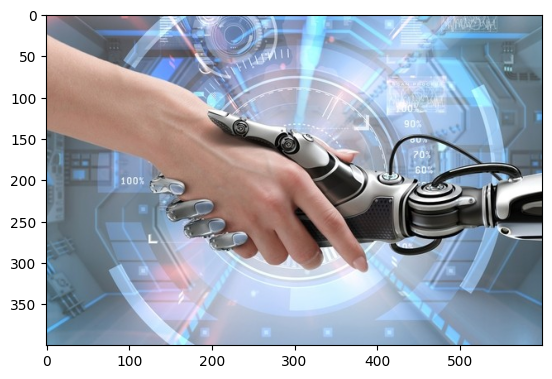

(400, 600, 3)
[[[218 149 167]
  [215 146 164]
  [211 144 161]
  ...
  [117 146 162]
  [116 145 161]
  [116 145 161]]

 [[215 148 165]
  [212 145 162]
  [207 143 159]
  ...
  [116 145 161]
  [116 145 161]
  [116 145 161]]

 [[209 147 162]
  [206 144 159]
  [202 141 156]
  ...
  [114 143 159]
  [114 143 159]
  [114 143 159]]

 ...

 [[104 146 171]
  [103 147 172]
  [105 149 174]
  ...
  [115 146 174]
  [115 146 174]
  [115 146 174]]

 [[106 145 174]
  [107 146 175]
  [109 148 177]
  ...
  [115 146 174]
  [116 147 175]
  [116 147 175]]

 [[108 145 174]
  [109 146 175]
  [109 148 177]
  ...
  [116 147 175]
  [116 147 175]
  [117 148 176]]]


In [ ]:
import matplotlib.pyplot as plt
#from matplotlib.image import imread
from skimage.io import imread

url = 'https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg'
orig_img = imread(url)


plt.imshow(orig_img)
plt.show()

print(orig_img.shape)
print(orig_img)

### Фотографирование с помощью камеры в Google Colab

In [ ]:
# I have no idea who is the author of the code
# in this cell that saves an image from a webcam
# inside google colab.
# It comes from a notebook called "📸 Take a photo with your webcam"

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return len(binary)

In [ ]:
img = take_photo() # click

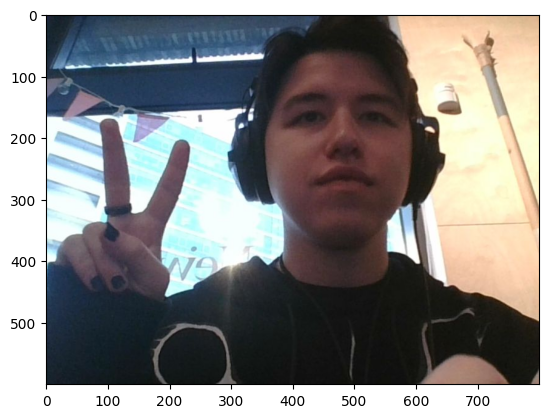

(600, 800, 3)
[[[ 36  40  75]
  [ 36  41  73]
  [ 37  40  73]
  ...
  [210 175 135]
  [207 172 130]
  [203 168 126]]

 [[ 34  38  73]
  [ 34  39  71]
  [ 35  38  71]
  ...
  [212 177 137]
  [209 174 132]
  [206 171 129]]

 [[ 32  36  71]
  [ 32  37  69]
  [ 33  36  69]
  ...
  [213 178 138]
  [211 176 134]
  [209 174 132]]

 ...

 [[ 27  37  47]
  [ 26  36  46]
  [ 24  34  44]
  ...
  [158 128 117]
  [162 130 117]
  [163 131 118]]

 [[ 26  36  46]
  [ 25  35  45]
  [ 23  33  43]
  ...
  [159 127 116]
  [161 129 116]
  [161 129 116]]

 [[ 26  36  46]
  [ 25  35  45]
  [ 22  32  42]
  ...
  [158 126 115]
  [159 127 114]
  [160 128 115]]]


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

print(img.shape)
print(img)

## ДЗ 1

Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

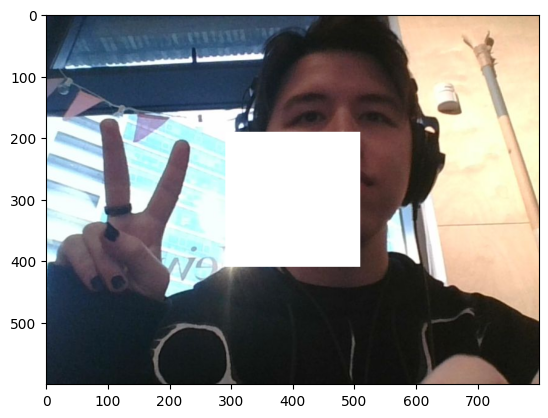

In [ ]:
import math
from skimage.io import imread
import numpy as np

h, w = img.shape[:2]

xc, yc = w//2, h//2
whr = int(math.sqrt((w * h) // 10))
xr, yr = xc-(whr//2), yc-(whr//2)

img_r = img.copy()

img_r[yr:yr+whr, xr:xr+whr] = [255,255,255]

plt.imshow(img_r)

## 2. Видео

### Работа с видео на своем компьютере

In [ ]:
!pip install opencv-python

In [ ]:
'''
import cv2
from datetime import datetime

capture = cv2.VideoCapture(0 + cv2.CAP_DSHOW)

while True:
    rtrn, image = capture.read()
    if image is None:
        from skimage import io
        image = io.imread('https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg');
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    now = datetime.now()
    date_time = now.strftime("%d/%m/%Y, %H:%M:%S")
    cv2.putText(image, date_time, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1., (0,255,255), 2)
    cv2.imshow("OpenCV", image)

    if cv2.waitKey(1) == 27:
        break

capture.release()
cv2.destroyAllWindows()
'''

'\nimport cv2\nfrom datetime import datetime\n\ncapture = cv2.VideoCapture(0 + cv2.CAP_DSHOW)\n\nwhile True:\n    rtrn, image = capture.read()\n    if image is None:\n        from skimage import io\n        image = io.imread(\'https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg\');\n        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n\n    now = datetime.now()\n    date_time = now.strftime("%d/%m/%Y, %H:%M:%S")\n    cv2.putText(image, date_time, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1., (0,255,255), 2)\n    cv2.imshow("OpenCV", image)\n\n    if cv2.waitKey(1) == 27:\n        break\n\ncapture.release()\ncv2.destroyAllWindows()\n'

### Загрузка видео из файла, изменение, сохранение


In [ ]:
!wget http://thinkingform.com/wp-content/uploads/2017/09/video-sample-mp4.mp4

--2023-12-12 11:35:57--  http://thinkingform.com/wp-content/uploads/2017/09/video-sample-mp4.mp4
Resolving thinkingform.com (thinkingform.com)... 143.95.224.16
Connecting to thinkingform.com (thinkingform.com)|143.95.224.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383631 (375K) [video/mp4]
Saving to: ‘video-sample-mp4.mp4’

video-sample-mp4.mp 100%[===================>] 374.64K  --.-KB/s    in 0.09s   

2023-12-12 11:35:57 (3.99 MB/s) - ‘video-sample-mp4.mp4’ saved [383631/383631]



In [ ]:
import cv2
from datetime import datetime
date_time = datetime.now()

capture = cv2.VideoCapture('video-sample-mp4.mp4')
width  = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))   # float `width`
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
codec = cv2.VideoWriter_fourcc(*'MP4V')
output = cv2.VideoWriter('output.mp4', codec, 30.0, (width,  height))

while True:
    rtrn, image = capture.read()
    if not rtrn:
        break

    now = datetime.now()
    date_time = now.strftime("%d/%m/%Y, %H:%M:%S")
    cv2.putText(image, date_time, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1., (0,255,255), 2)
    output.write(image)

capture.release()
output.release()

### Просмотр видео в Google Colab

In [ ]:
!pip install imageio-ffmpeg >> None

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(16,8))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
video = imageio.mimread('output.mp4')  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

## ДЗ 2

Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

In [ ]:
import cv2
import random

import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

cap = cv2.VideoCapture('video-sample-mp4.mp4')
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
codec = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', codec, 30.0, (width,  height))


ret, img = cap.read()
while ret:
    y = random.randint(0, h-10)
    x = random.randint(0, w-10)

    img[y:y+50, x:x+50] = [255, 255, 255]
    out.write(img)

    ret, img = cap.read()

cap.release()
out.release()

def display_video(video):
    fig = plt.figure(figsize=(16,8))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime


video = imageio.mimread('output.mp4')  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

## 3. Аудио данные


### Работа с аудио на своем компьютере

In [ ]:
!apt-get install portaudio19-dev

!pip install pyAudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (207 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.

In [ ]:
'''
# https://habr.com/ru/post/577806/

import pyaudio
import wave

CHUNK = 1024 # определяет форму ауди сигнала
FRT = pyaudio.paInt16 # шестнадцатибитный формат задает значение амплитуды
CHAN = 1 # канал записи звука
RT = 44100 # частота
REC_SEC = 5 #длина записи
OUTPUT = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FRT,channels=CHAN,rate=RT,input=True,frames_per_buffer=CHUNK) # открываем поток для записи
print("rec")
frames = [] # формируем выборку данных фреймов
for i in range(0, int(RT / CHUNK * REC_SEC)):
    data = stream.read(CHUNK)
    frames.append(data)
print("done")

stream.stop_stream() # останавливаем и закрываем поток
stream.close()
p.terminate()

w = wave.open(OUTPUT, 'wb')
w.setnchannels(CHAN)
w.setsampwidth(p.get_sample_size(FRT))
w.setframerate(RT)
w.writeframes(b''.join(frames))
w.close()
'''

'\n# https://habr.com/ru/post/577806/\n\nimport pyaudio\nimport wave\n\nCHUNK = 1024 # определяет форму ауди сигнала\nFRT = pyaudio.paInt16 # шестнадцатибитный формат задает значение амплитуды\nCHAN = 1 # канал записи звука\nRT = 44100 # частота\nREC_SEC = 5 #длина записи\nOUTPUT = "output.wav"\n\np = pyaudio.PyAudio()\n\nstream = p.open(format=FRT,channels=CHAN,rate=RT,input=True,frames_per_buffer=CHUNK) # открываем поток для записи\nprint("rec")\nframes = [] # формируем выборку данных фреймов\nfor i in range(0, int(RT / CHUNK * REC_SEC)):\n    data = stream.read(CHUNK)\n    frames.append(data)\nprint("done")\n\nstream.stop_stream() # останавливаем и закрываем поток\nstream.close()\np.terminate()\n\nw = wave.open(OUTPUT, \'wb\')\nw.setnchannels(CHAN)\nw.setsampwidth(p.get_sample_size(FRT))\nw.setframerate(RT)\nw.writeframes(b\'\'.join(frames))\nw.close()\n'

### Запись аудио с компьютера в Google Colab

In [ ]:
!pip install ffmpeg-python >> None

In [ ]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
from scipy.io.wavfile import write as wav_write
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))
  OUTPUT = "output.wav"
  wav_write(OUTPUT, sr, audio)

  return audio, sr

In [ ]:
audio, sr = get_audio()

### Распознавание речи

In [ ]:
!pip install SpeechRecognition >> None

In [ ]:
OUTPUT = "output.wav"
import speech_recognition as speech_r
r = speech_r.Recognizer()
harvard = speech_r.AudioFile(OUTPUT)
with harvard as source:
    audio = r.record(source)

print(r.recognize_google(audio, language="ru-RU"))

UnknownValueError: ignored

### ESC-50: Dataset for Environmental Sound Classification

https://dagshub.com/kinkusuma/esc50-dataset

In [ ]:
import numpy as np
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_data = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-17970-A-4.wav'
data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data).read()))
#data, sample_rate = librosa.load(audio_data, sr=None)

### Воспроизведение звукового файла

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

### Построение графика амплитуды звуковой волны

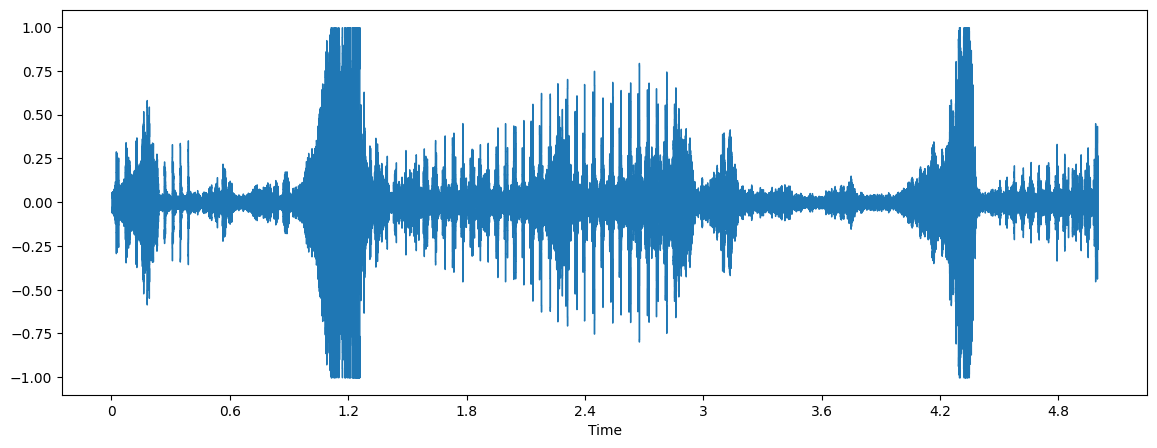

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
left = 0
right = 220000

print(data.shape)
print(data[left:right].max() - data[left:right].min())

(220500,)
1.999969482421875


### Построение спектрограммы

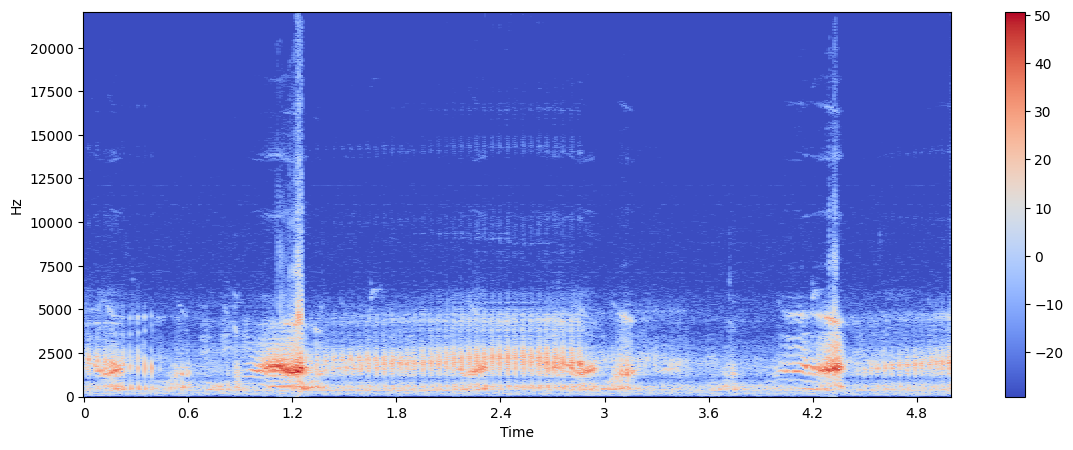

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

### Изучение определенного участка звукового файла

In [ ]:
three_seconds = sample_rate * 3
data_ = data[:three_seconds]

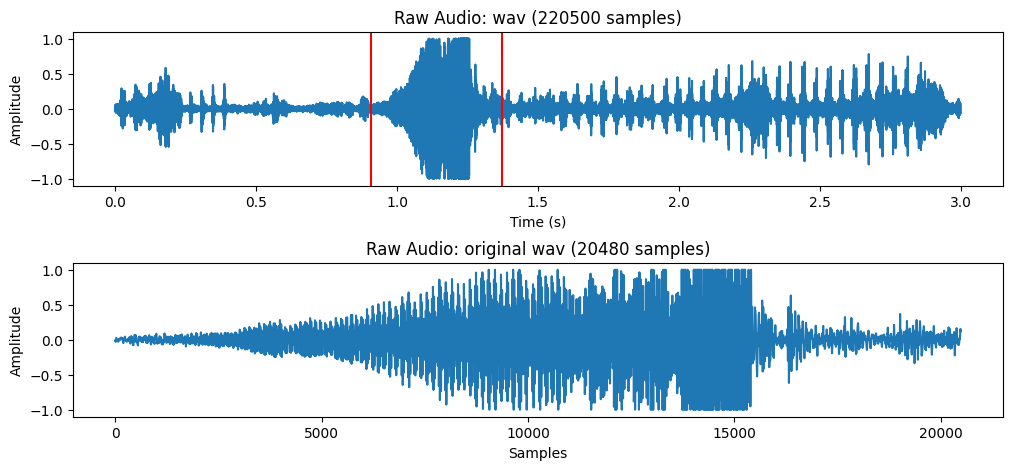

In [ ]:
timesteps = np.arange(len(data_)) / sample_rate  # in seconds

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# plot the entire clip
ax[0].plot(timesteps, data_)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format('wav', len(data)))


n_fft = 1024*20 # frame length
start = 40000 # start at a part of the sound thats not silence..
x = data_[start:start+n_fft]

# mark location of frame in the entire signal
ax[0].axvline(start/sample_rate, c='r')
ax[0].axvline((start+n_fft)/sample_rate, c='r')

# plot N samples
ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio: {} ({} samples)'.format('original wav', len(x)));

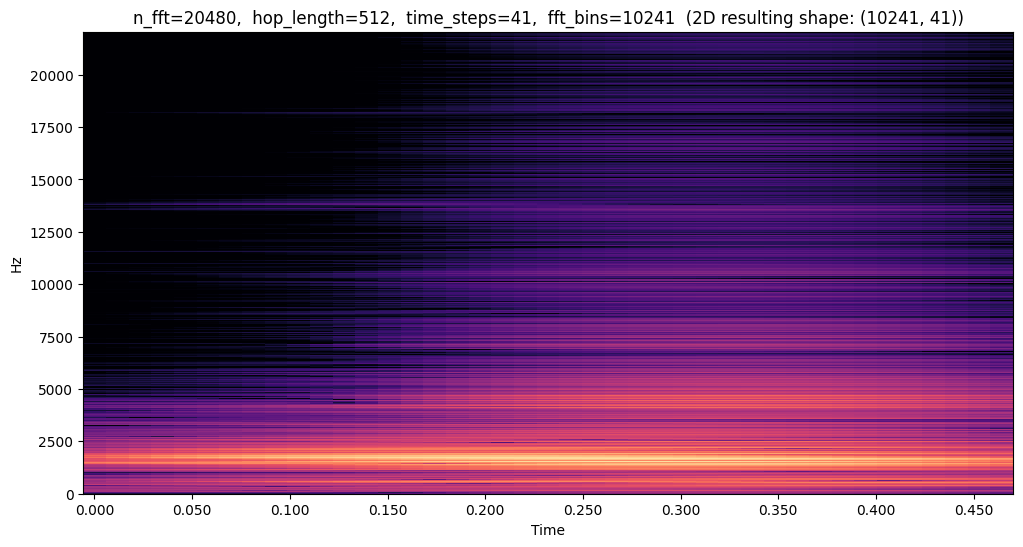

In [ ]:
hop_length = 512
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear',
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length,
                       stft_magnitude_db.shape[1],
                       stft_magnitude_db.shape[0],
                       stft_magnitude_db.shape));

## ДЗ 3

1. Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
2. визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
3. построить спектрограмму для найденного участка;
4. подумать (и реализовать), как с помощью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

In [ ]:
import numpy as np
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_data_url = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-100032-A-0.wav'

audio_data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data_url).read()))

import IPython.display as ipd
ipd.Audio(audio_data, rate=sample_rate)

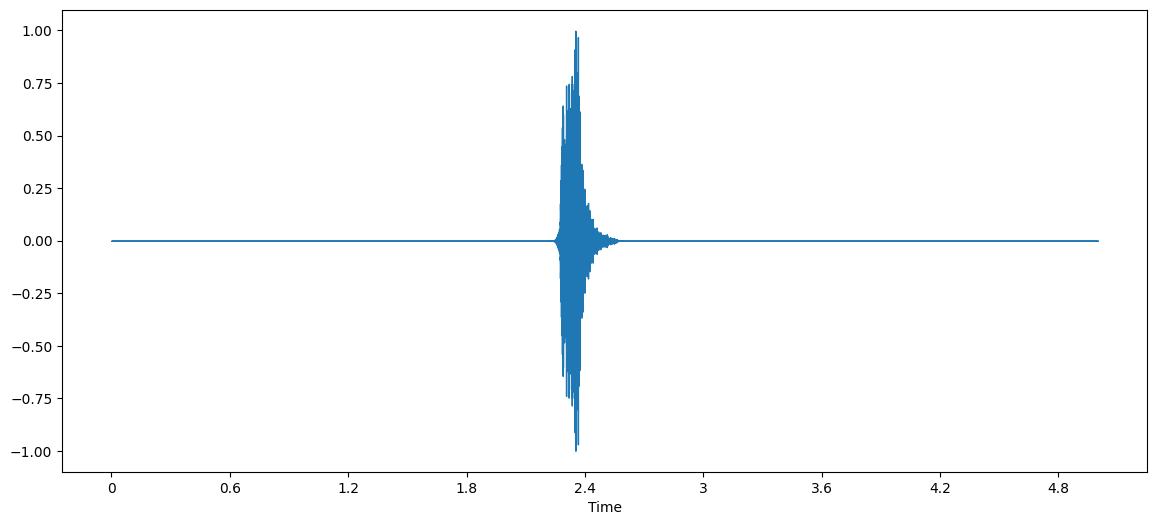

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 6))
librosa.display.waveshow(audio_data, sr=sample_rate)

In [ ]:
start_time = 2.1
end_time = 2.7

start_index = int(start_time * sample_rate)
end_index = int(end_time * sample_rate)

print(f'start={start_index}; end={end_index}')

start=92610; end=119070


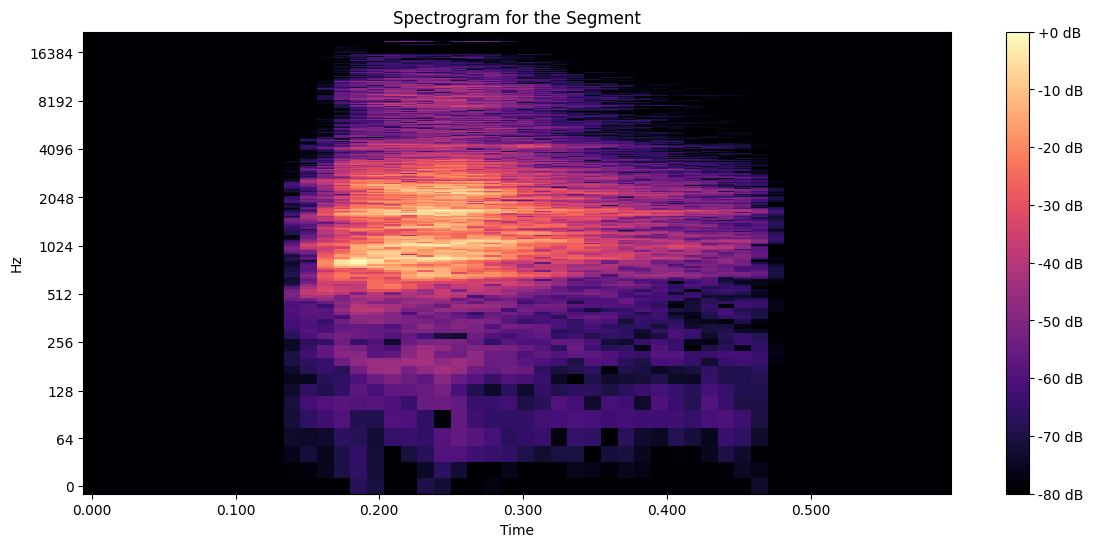

In [ ]:
audio_segment = audio_data[start_index:end_index]

RafXDb = librosa.amplitude_to_db(np.abs(librosa.stft(audio_segment)), ref=np.max)

plt.figure(figsize=(14, 6))
librosa.display.specshow(RafXDb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for the Segment')
plt.show()

Indices of silent sections: [     0      1      2 ... 220497 220498 220499]


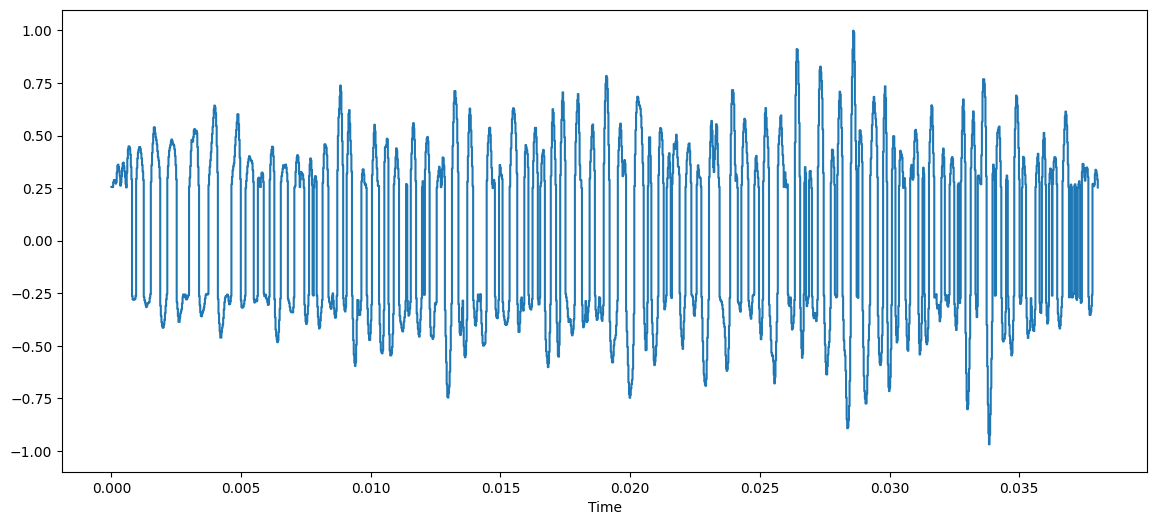

In [ ]:
import numpy as np
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_data_url = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/1-100032-A-0.wav'

audio_data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data_url).read()))

silence_threshold = 0.25
silence_indices = np.where(np.abs(audio_data) < silence_threshold)[0]

print("Indices of silent sections:", silence_indices)

audio_data_without_silence = np.delete(audio_data, silence_indices)

plt.figure(figsize=(14, 6))
librosa.display.waveshow(audio_data_without_silence, sr=sample_rate)
plt.show()


In [ ]:
ipd.Audio(audio_data_without_silence, rate=sample_rate)


## 4. Таблицы и временные ряды

### Пример работы с таблицами в библиотеке Pandas.


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv'
df = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
df.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

### Чтение из текстового файла данных временного ряда, визуализация

[[0.000e+00 5.800e+01]
 [1.000e+00 6.300e+01]
 [2.000e+00 7.000e+01]
 ...
 [3.074e+03 1.800e+01]
 [3.075e+03 3.100e+01]
 [3.076e+03 2.900e+01]]


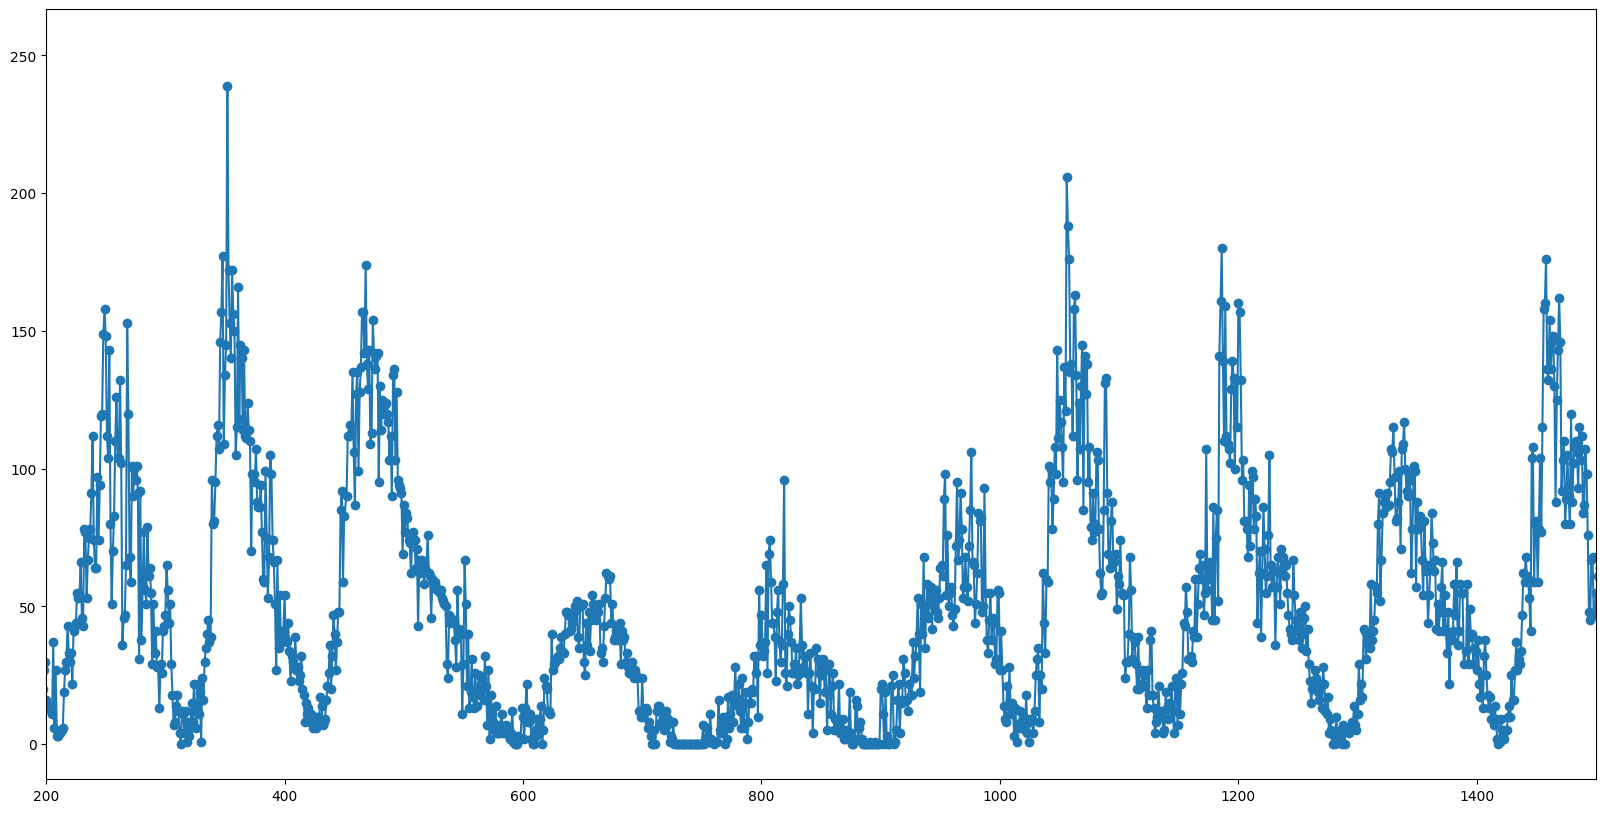

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests

series = np.empty((0,2), dtype='f')

url = 'https://raw.githubusercontent.com/sjackman/bc/master/data/astro/sunspot.txt'
response = requests.get(url)
data = response.text
data = data.split("\n") # then split it into lines

#print(data)
for i,line in enumerate(data):
    if i<3: continue
    words = line.split()
    if len(words) < 6: continue
    #print([[i-3], float(words[-1])])
    series = np.append(series, [[i-3, float(words[-1])]], axis=0)

print(series)
X = series[:,0]
y = series[:,1]

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.xlim(200,1500)
plt.show()

### Сглаживание временного ряда методом скользящего среднего

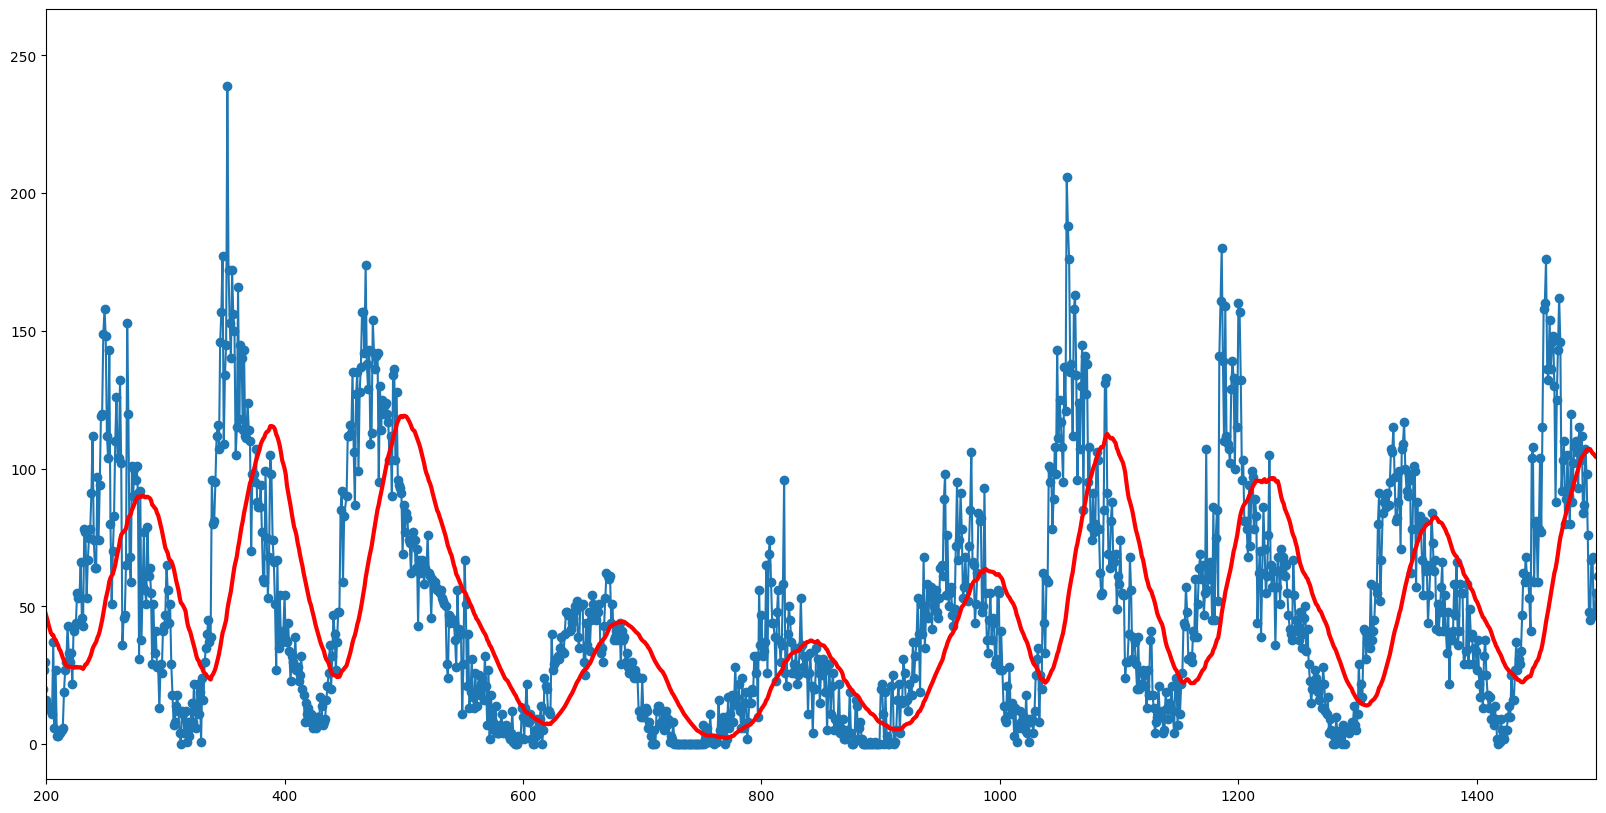

In [ ]:
def moving_average(series, windowsize):
    result = [series[windowsize-1]]
    for t in range(windowsize,len(series)):
        result.append(sum(series[t-n] for n in range(windowsize)) / (windowsize))
    return result

k = 50
y_ma = moving_average(y,k)

plt.figure(figsize=(20,10))
plt.plot(X,y)
plt.scatter(X,y)
plt.plot(X[k-1:], y_ma, c='r', linewidth=3)
plt.xlim(200,1500)
plt.show()

### Временной ряд - местоположение автобусов города Казани

http://data.kzn.ru/dinamic_datasets/bus

In [ ]:
import urllib.request
import json

url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus.json"
req = urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data[0])
GaragNumb = data[0]['data']['GaragNumb']
print(GaragNumb)

In [ ]:
url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/" + GaragNumb + ".json"
req = urllib.request.Request(url)
r = urllib.request.urlopen(req).read()
data = json.loads(r.decode('utf-8'))
print(data)

In [ ]:
import threading
import time

maxthreads = 2
sema = threading.Semaphore(value=maxthreads)
threads = list()

location = []

def task(i):
    global location
    sema.acquire()
    url = "http://data.kzn.ru:8082/api/v0/dynamic_datasets/bus/" + GaragNumb + ".json"
    req = urllib.request.Request(url)
    r = urllib.request.urlopen(req).read()
    data = json.loads(r.decode('utf-8'))
    #print(data['data']['Latitude'], data['data']['Longitude'])
    cur_loc = [float(data['data']['Latitude']), float(data['data']['Longitude'])]
    location.append(cur_loc)
    time.sleep(100)
    sema.release()

for i in range(20):
    thread = threading.Thread(target=task,args=(i,))
    threads.append(thread)
    thread.start()

for t in threads:
    t.join()

In [ ]:
location = [[55.825526, 49.035777], [55.832952, 49.06102], [55.833072, 49.066256], [55.83327, 49.076737], [55.833377, 49.081586], [55.834517, 49.08901], [55.835372, 49.096176], [55.835805, 49.100174], [55.830532, 49.100956], [55.826873, 49.108947]]
print(location)

[[55.825526, 49.035777], [55.832952, 49.06102], [55.833072, 49.066256], [55.83327, 49.076737], [55.833377, 49.081586], [55.834517, 49.08901], [55.835372, 49.096176], [55.835805, 49.100174], [55.830532, 49.100956], [55.826873, 49.108947]]


### Работа с геоданными в Python и Jupyter

https://proglib.io/p/rabota-s-geodannymi-v-python-i-jupyter-2021-03-22


In [ ]:
!pip install ipyleaflet >> None

In [ ]:
from ipyleaflet import AntPath, WidgetControl
from ipyleaflet import Map, Marker, Popup
from ipywidgets import IntSlider, jslink
from ipywidgets import HTML

m = Map(center=tuple(location[0]), zoom=13)

bus_path = AntPath(
    locations=location,
    dash_array=[1, 10],
    delay=1000,
    color='#9500ff',
    pulse_color='#9500ff'
)

m.add_layer(bus_path)

start_marker = Marker(location=tuple(location[0]))
m.add_layer(start_marker)

finish_marker = Marker(location=tuple(location[-1]))
m.add_layer(finish_marker)

start = HTML()
finish = HTML()
start.value = "Старт"
finish.value = "Финиш!"
start_marker.popup = start
finish_marker.popup = finish

zoom_slider = IntSlider(description='Масштаб:', min=11, max=15, value=13)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)

m

Map(center=[55.825526, 49.035777], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

## 5. Тексты

### Сбор данных через VK API

1. Авторизуйтесь ВКонтакте и зайдите на страничку разработчиков **https://dev.vk.com/**

2. Нажимите на кнопку **"Создать приложение"**.

3. Введите имя, тип Standalone, нажите **"Подключить приложение"**.

4. Подтвердите действие.

5. После создания приложения зайдите в его настройки и скопируйте его идентификатор. Нажмите на кнопку **"Редактировать"** рядом с нужным приложением. В адресной строке появится его id. \
Из этой ссылки: https://vk.com/editapp?id=8031498 видно, что id=8031498.

6. Соберите ссылку для получения ключа.\
Плюсом токена для параноиков является то, что он может быть выдан на определённый срок.\
Полезная информация по настройкам:
https://dev.vk.com/api/access-token/implicit-flow-user \\
Токен можно получить прямо из браузера. Для этого нужно только перейти по правильной ссылке. Как составить правильную ссылку:\
https://oauth.vk.com/authorize?client_id=8031498&display=page&redirect_uri=https://oauth.vk.com/blank.html&response_type=token&v=5.103&state=123456



7. Перейдите по собранной ссылке.\
Вы получите access_token — строку наподобие:  **f367ca560512280f3668289211770e74afadd78ca79c5198a6f64875b63b060de43a339a3b4110e49b902** \
Она появится в адресной строке, подписанная как access_token.\
https://oauth.vk.com/blank.html#access_token=f367ca560512280f3668289211770e74afadd78ca79c5198a6f64875b63b060de43a339a3b4110e49b902&expires_in=86400&user_id=8031498&state=123456

In [ ]:
token = 'f367ca560512280f3668289211770e74afadd78ca79c5198a6f64875b63b060de43a339a3b4110e49b902'

In [ ]:
# https://vk.com/mashinnoe_obuchenie_ai_big_data
ID = 'mashinnoe_obuchenie_ai_big_data'

import requests
from datetime import datetime

num_item = 0
json_response = requests.get(('https://api.vk.com/method/wall.get?count=10&offset={}&domain={}&v=5.103&access_token=' + token).\
                        format(0, ID)).json()

if json_response.get('error'):
    print(json_response.get('error'))
else:
    for item in json_response['response']['items']:
        print(num_item, ": ", datetime.fromtimestamp(item['date']))
        print(item['text'])
        print('--------------')
        num_item += 1

{'error_code': 5, 'error_msg': 'User authorization failed: invalid access_token (4).', 'request_params': [{'key': 'count', 'value': '10'}, {'key': 'offset', 'value': '0'}, {'key': 'domain', 'value': 'mashinnoe_obuchenie_ai_big_data'}, {'key': 'v', 'value': '5.103'}, {'key': 'method', 'value': 'wall.get'}, {'key': 'oauth', 'value': '1'}]}


## ДЗ 4

1. Создайте приложения для работы с API VK;
2. получите свой токен для автоматизации действий в соцсети;
3. соберите не менее 2000 не пустых текстовых сообщений со стены любой открытой группы;
4. сохраните сообщения во внешний файл для дальнейшего чтения и работы.

In [91]:
# https://oauth.vk.com/authorize?client_id=51813473&redirect_uri=https://oauth.vk.com/blank.html&scope=offline&display=mobile&response_type=token&v=5.154

ID = 'everydaysounds'
token = 'vk1.a.KWyFyyvfTpc4kEZweyithcDJDW3OBf-pNxrdBDHB36GKX7fbOYS8XQ-I_TfA8GEOWMgknbKK6aIADokEHBpYVI-KEb3Iv5UZd9gyJHhVxVWzIYrcmGBeEFMqQuOkRCI1uK8WbJMeOgprZjcjc8LpNpvUUfR4D0aAT_cazwP7O_MrQ50jfSm3kQMjTGDyZhLyTQ-_wsmrzb7wHVFiQJVgLw'

In [ ]:
import requests
from datetime import datetime
import csv

num_item = 0

post_max = 300
post_count = 0
offset = 0
req_count = 20
with open("posts.txt", 'w') as f:
  writer = csv.writer(f)

  while post_count < post_max:
    json_response = requests.get(f'https://api.vk.com/method/wall.get?count={req_count}&offset={offset}&domain={ID}&v=5.103&access_token={token}').json()
    offset += req_count
    if json_response.get('error'):
        print(json_response.get('error'))
        break
    else:
        post_list = [item["text"] for item in json_response['response']['items'] if item["text"]]
    posts_to_add = min(post_max-post_count, len(post_list))
    writer.writerows(post_list[:posts_to_add])
